C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shilp\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is se

AR(1) AIC: 1078.0541689165111
AR(3) AIC: 1050.4728998359697


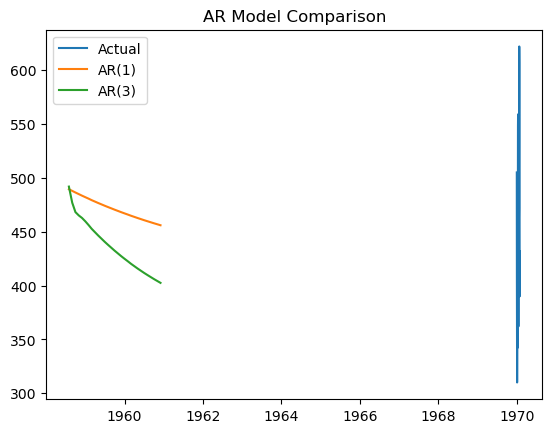

In [1]:
#  AR MODEL

import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

url ="AirPassengers - AirPassengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['#Passengers']
# i. Examine ACF and PACF (already plotted above)
# PACF cuts off at lag p → AR(p) model

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
# ii. Fit AR(1) model
ar1_model = AutoReg(train, lags=1).fit()
ar1_pred = ar1_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(1) AIC: {ar1_model.aic}")

# iii. Fit higher lag AR models
ar3_model = AutoReg(train, lags=3).fit()
ar3_pred = ar3_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(3) AIC: {ar3_model.aic}")

plt.plot(test.values, label='Actual')
plt.plot(ar1_pred, label='AR(1)')
plt.plot(ar3_pred, label='AR(3)')
plt.legend()
plt.title('AR Model Comparison')
plt.show()